# Assignment 3: numpy
## Create jupyter notebook with 4 data illustrations

1. First create a file with your python module. This is where you should put your functions to be used in the notebook.

### Imports
(The Enum class is used for the function made in exercise 5)

In [1]:
import Funktion_module as fm

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

from enum import Enum

class datapicker(Enum):
    YEAR = 0
    AREA = 1
    AGE = 2
    CITYCODE = 3
    POPULATION = 4

2. Second create a function to read the csv file containing Copenhagen city population data and return a numpy array (numpy.ndarray). **hint:** use `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)` as in the slides

In [2]:
data = fm.get_copenhagen_population_data_array()
print(data)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


3. Third create a function that can extract the number of all the citizens from native english speaking countries and from non english speaking countries. How many are there of each? (**hint** remember that with python you can return multiple values from a function).

In [3]:
english, nonenglish = fm.get_amount_english_and_nonenglish()
print("English:", english, "Non-english:", nonenglish)

English: 9053 Non-english: 571242


4. Now create another function that can take 2 arguments:
  - 1: the dataset in the form of a 2dimensional data array where y=data rows and x=[year, area, age nationality, amount].
  - 2: the mask in the form: data[:,3] == 5120 to find swedish or data[:,0] == 1999 to filter on year
  - the return value must be the filtered dataset.

In [4]:
mask = data[:,0] == 1999
fm.filtered_data(data, mask)

array([[1999,    1,    0, 5100,  543],
       [1999,    1,    0, 5103,    1],
       [1999,    1,    0, 5104,    1],
       ...,
       [1999,   99,   86, 5100,    1],
       [1999,   99,   94, 5100,    1],
       [1999,   99,  100, 5100,    1]], dtype=uint32)

5. Create another function that can take 2 arguments:
  - a dataset with same characteristics as above and
  - a value for the x-axis (either year, area, age or nationality)
  - return value should be the accumulated population for all x-values.
  - **hint:** if year is chosen for x then y is all accumulated amounts from all areas, ages and nationalities.

In [5]:
fm.accumulated_value(data, datapicker.POPULATION)

12169396

6. Create Illustration 1: In your notebook use the above function and create a 2d array of year as x and accumulated amount as y:
  - create a line graph of the population change over time for all of Copenhagen

In [6]:
#unique_years is also used in exercise 7
unique_years = np.unique(data[:,0])

acc_list = []

for year in unique_years:
    mask = data[:,0] == year
    filtered = fm.filtered_data(data, mask)
    acc = fm.accumulated_value(filtered, datapicker.POPULATION)
    acc_list.append(acc)

<IPython.core.display.Javascript object>


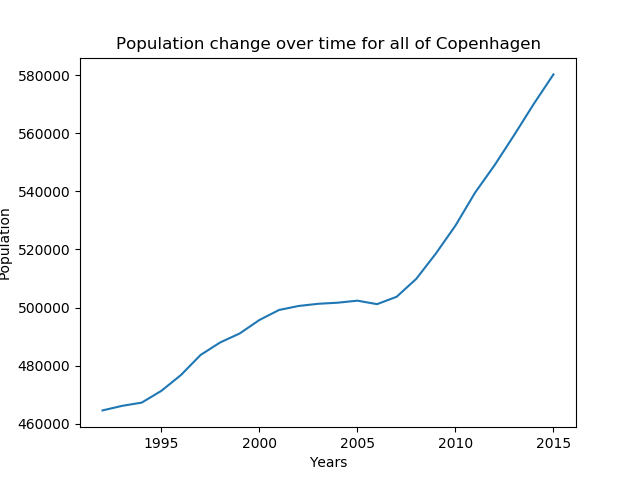

In [7]:
plt.figure()
plt.title("Population change over time for all of Copenhagen")
plt.xlabel("Years")
plt.ylabel("Population")
plt.plot(unique_years, acc_list)
plt.show()

7. Create illustration 2: In your notebook use your module to create a dataset where development of all German citizens can be shown over time

In [8]:
acc_list = []
germany = 5180

for year in unique_years:
    mask = ((data[:,0] == year) & (data[:,3] == germany))
    filtered = fm.filtered_data(data, mask)
    acc = fm.accumulated_value(filtered, datapicker.POPULATION)
    acc_list.append(acc)

<IPython.core.display.Javascript object>


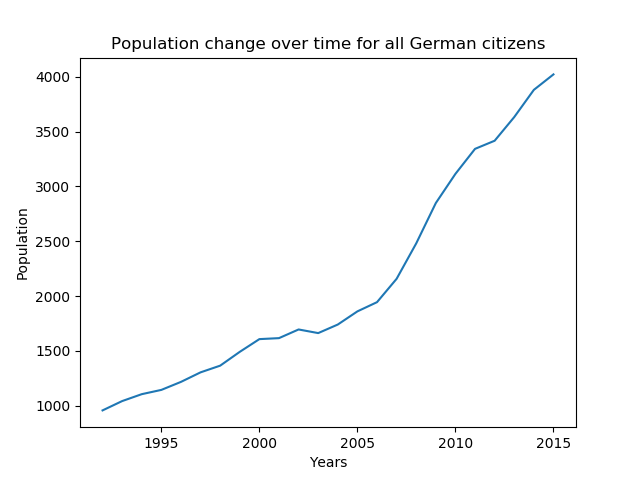

In [9]:
plt.figure()
plt.title("Population change over time for all German citizens")
plt.xlabel("Years")
plt.ylabel("Population")
plt.plot(unique_years, acc_list)
plt.show()

8. Create illustration 3: Show a bar plot of all the 18-25 year old in the different areas of copenhagen and in the same plot show (in a different color) all 60-67 year old in the different areas.

In [10]:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Others'}

area_keys = neighb.keys()

young_vals = []
old_vals = []

year_of_interest = 2015

for area in area_keys:
    young_mask = ((data[:,2] >= 18) & (data[:,2] <= 25) & (data[:,0] == year_of_interest) & (data[:,1] == area))
    old_mask = ((data[:,2] >= 60) & (data[:,2] <= 67) & (data[:,0] == year_of_interest) & (data[:,1] == area))
    
    young_filtered = fm.filtered_data(data, young_mask)
    old_filtered = fm.filtered_data(data, old_mask)

    young_accumulated = fm.accumulated_value(young_filtered, datapicker.POPULATION)
    old_accumulated = fm.accumulated_value(old_filtered, datapicker.POPULATION)
    
    young_vals.append(young_accumulated)
    old_vals.append(old_accumulated)
    
    #Without the functions it could've also be done likewise:
    #young_vals.append(sum(data[young_mask][:,-1]))
    #old_vals.append(sum(data[old_mask][:,-1]))

print(young_vals)
print(old_vals)

[7759, 10896, 15399, 8562, 7269, 5227, 5251, 10154, 9139, 9418, 779]
[4204, 5075, 3396, 3094, 3212, 3005, 3316, 3057, 3258, 4011, 102]


<IPython.core.display.Javascript object>


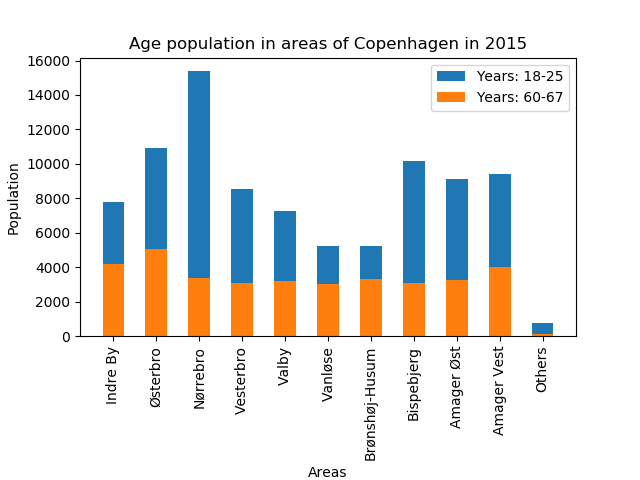

In [11]:
area_values = neighb.values()

plt.figure()

young = plt.bar(area_values, young_vals, width=0.5, linewidth=0, align='center')
old = plt.bar(area_values, old_vals, width=0.5, linewidth=0, align='center')

plt.title("Age population in areas of Copenhagen in 2015")
plt.xlabel("Areas")
plt.ylabel("Population")
plt.legend([young, old],["Years: 18-25", "Years: 60-67"])

plt.xticks(list(area_values), list(area_values), rotation='vertical')
plt.subplots_adjust(bottom=0.30)

plt.show()

9. Create illustration 4: show a pie chart of age groups (0-10, 10-20, 20-30 ...) in Østerbro part of Copenhagen. create another similar piechart for Vesterbro.

In [12]:
ages = np.unique(data[:,2])
max_age = int(max(ages))
østerbro = 2

age_population, labels = fm.get_age_population_of_age_in_area(data, max_age, østerbro, datapicker)

<IPython.core.display.Javascript object>


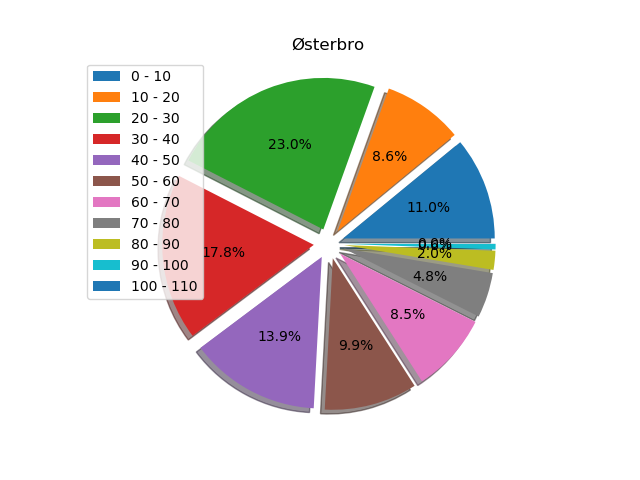

In [13]:
fig, ax = plt.subplots()
explode = ()
for num in range(len(age_population)):
    to_be_added = (0.1,)
    explode += to_be_added
    
my_pie, texts, autopct = ax.pie(age_population, explode=explode, shadow=True, autopct='%1.1f%%')
ax.legend(my_pie, labels)
ax.set_title("Østerbro")
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [14]:
ages = np.unique(data[:,2])
max_age = int(max(ages))
vesterbro = 4

age_population, labels = fm.get_age_population_of_age_in_area(data, max_age, vesterbro, datapicker)

<IPython.core.display.Javascript object>


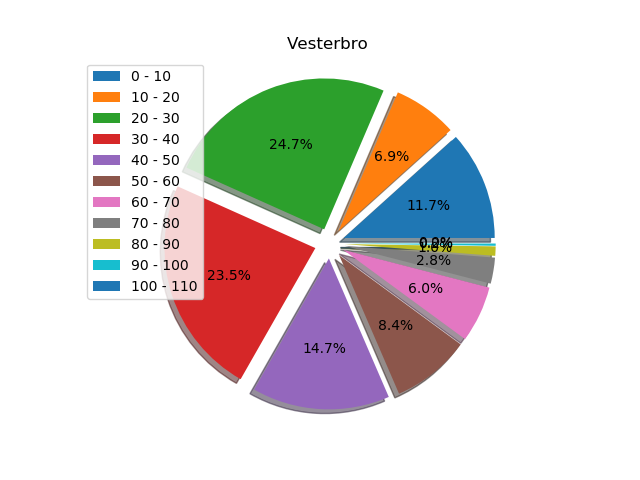

In [15]:
fig, ax = plt.subplots()
explode = ()
for num in range(len(age_population)):
    to_be_added = (0.1,)
    explode += to_be_added
    
my_pie, texts, autopct = ax.pie(age_population, explode=explode, shadow=True, autopct='%1.1f%%')
ax.legend(my_pie, labels)
ax.set_title("Vesterbro")
ax.axis('equal')
plt.show()